In [100]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob, os
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math

from PIL import Image
from keras.preprocessing.image import img_to_array

In [101]:
# Convolutional Layer 1.
filter_size1 = 5          # Convolution filters are 5 x 5 pixels.
num_filters1 = 16         # There are 16 of these filters.

# Convolutional Layer 2.
filter_size2 = 5          # Convolution filters are 5 x 5 pixels.
num_filters2 = 36         # There are 36 of these filters.

# Fully-connected layer.
fc_size = 128             # Number of neurons in fully-connected layer.


In [102]:
# Read Train Dataset Images and Display them

In [103]:
os.chdir("/home/admin1/NUS_MCOMP/ML/Project/fwd/group_1/train")

train_labels = np.empty(shape=[0, 2], dtype=np.float32)

#crete the training set
tx = []
train = []
count = 0
for file in glob.glob("*.jpg"):
    #print(file)
    name=file.split('_')
    
    train_labels = np.append(train_labels, name[1])
    #print label
    #print name
    filename = '/home/admin1/NUS_MCOMP/ML/Project/fwd/group_1/train/{}'.format(file)
    #print filename
    img    = mpimg.imread(filename)
    temp_x = img_to_array(img)
    temp_x = img.reshape([256, 256])
    #print(temp_x.shape)
    tx  = np.append(tx, temp_x)
    tx = tx.tolist()
    train.append(tx)
    tx = []
    #print(x1)
    #break
    #imgplot = plt.imshow(temp_x,cmap='gray_r')
    #plt.imshow(char, cmap='gray_r')
    #plt.show()
    #break
    #x = tf.reshape(x, shape=[-1, 256, 256, 1])
    #print(temp_x)
    #break

    if(count == 100):
            break
    
    count += 1
 
train = np.array(train)
print(train)
train_labels = np.array(pd.get_dummies(train_labels).astype(np.float32))

norm_train_labels = np.argmax(train_labels, axis=1)
print(norm_train_labels)

[[ 141.  161.  154. ...,  174.  188.  199.]
 [ 123.  122.  122. ...,    8.    7.   21.]
 [ 191.  193.  194. ...,    4.    0.    0.]
 ..., 
 [  88.   88.   88. ...,    4.    5.    3.]
 [ 248.  248.  248. ...,  105.   87.  109.]
 [ 176.  177.  177. ...,  127.  126.  125.]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1
 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1
 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0]


In [104]:
os.chdir("/home/admin1/NUS_MCOMP/ML/Project/fwd/group_1/test")

test_labels = np.empty(shape=[0, 2], dtype=np.float32)
tx   = []
test = []
count = 0
for file in glob.glob("*.jpg"):
    #print(file)
    name=file.split('_')
    test_labels = np.append(test_labels, name[1])
    #print(name[2])
    #break
    filename = '/home/admin1/NUS_MCOMP/ML/Project/fwd/group_1/test/{}'.format(file)
    img    = mpimg.imread(filename)
    temp_x = img_to_array(img)
    temp_x = img.reshape([256, 256])
    tx  = np.append(tx, temp_x)
    tx = tx.tolist()
    test.append(tx)
    tx = []
    if(count == 100):
        break
    
    count += 1
    
test = np.array(test)
print(test)

test_labels = np.array(pd.get_dummies(test_labels).astype(np.float32))

norm_test_labels = np.argmax(test_labels, axis=1)
print(norm_test_labels)

[[ 226.  226.  226. ...,   67.   42.   66.]
 [  67.   67.   67. ...,    5.    0.    0.]
 [  80.   77.   74. ...,   16.   13.   21.]
 ..., 
 [ 238.  237.  236. ...,   27.   40.   58.]
 [ 150.  150.  150. ...,  138.  184.  103.]
 [ 151.  151.  151. ...,  143.  140.  136.]]
[1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1
 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1
 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0]


In [105]:
# We know that images are 256 pixels in each dimension Initially.
img_size = 256

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each image is either Natural OR Man made scene.
num_classes = 2

In [106]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()



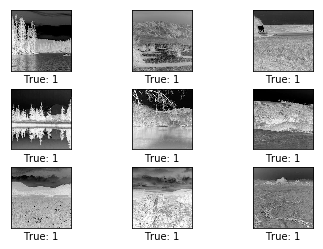

In [107]:
# Get the first images from the test-set.
images = train[0:9]

#print(images)
# Get the true classes for those images.
cls_true = norm_train_labels[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [108]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

In [109]:
def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

In [110]:
def new_conv_layer(input,              # The previous layer.
                   num_input_channels, # Num. channels in prev. layer.
                   filter_size,        # Width and height of each filter.
                   num_filters,        # Number of filters.
                   use_pooling=True):  # Use 2x2 max-pooling.

    # Shape of the filter-weights for the convolution.
    # This format is determined by the TensorFlow API.
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Create new weights aka. filters with the given shape.
    weights = new_weights(shape=shape)

    # Create new biases, one for each filter.
    biases = new_biases(length=num_filters)

    # Create the TensorFlow operation for convolution.
    # Note the strides are set to 1 in all dimensions.
    # The first and last stride must always be 1,
    # because the first is for the image-number and
    # the last is for the input-channel.
    # But e.g. strides=[1, 2, 2, 1] would mean that the filter
    # is moved 2 pixels across the x- and y-axis of the image.
    # The padding is set to 'SAME' which means the input image
    # is padded with zeroes so the size of the output is the same.
    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    # Add the biases to the results of the convolution.
    # A bias-value is added to each filter-channel.
    layer += biases

    # Use pooling to down-sample the image resolution?
    if use_pooling:
        # This is 2x2 max-pooling, which means that we
        # consider 2x2 windows and select the largest value
        # in each window. Then we move 2 pixels to the next window.
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    # Rectified Linear Unit (ReLU).
    # It calculates max(x, 0) for each input pixel x.
    # This adds some non-linearity to the formula and allows us
    # to learn more complicated functions.
    layer = tf.nn.relu(layer)

    # Note that ReLU is normally executed before the pooling,
    # but since relu(max_pool(x)) == max_pool(relu(x)) we can
    # save 75% of the relu-operations by max-pooling first.

    # We return both the resulting layer and the filter-weights
    # because we will plot the weights later.
    return layer, weights

In [111]:
#Helper Function for flatenning a layer

def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()

    # The shape of the input layer is assumed to be:
    # layer_shape == [num_images, img_height, img_width, num_channels]

    # The number of features is: img_height * img_width * num_channels
    # We can use a function from TensorFlow to calculate this.
    num_features = layer_shape[1:4].num_elements()
    
    # Reshape the layer to [num_images, num_features].
    # Note that we just set the size of the second dimension
    # to num_features and the size of the first dimension to -1
    # which means the size in that dimension is calculated
    # so the total size of the tensor is unchanged from the reshaping.
    layer_flat = tf.reshape(layer, [-1, num_features])

    # The shape of the flattened layer is now:
    # [num_images, img_height * img_width * num_channels]

    # Return both the flattened layer and the number of features.
    return layer_flat, num_features


In [112]:
#Helper-function for creating a new Fully-Connected Layer
def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 use_relu=True): # Use Rectified Linear Unit (ReLU)?

    # Create new weights and biases.
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if use_relu:
        layer = tf.nn.relu(layer)

    return layer

In [113]:
#Placeholder variables

In [114]:
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')

In [115]:
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])

In [116]:
y_true = tf.placeholder(tf.float32, shape=[None, 2], name='y_true')

In [117]:
y_true_cls = tf.argmax(y_true, dimension=1)

In [118]:
#Convolutional Layer 1
layer_conv1, weights_conv1 = \
    new_conv_layer(input=x_image,
                   num_input_channels=num_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True)

In [119]:
layer_conv1

<tf.Tensor 'Relu_6:0' shape=(?, 128, 128, 16) dtype=float32>

In [120]:
layer_conv2, weights_conv2 = \
    new_conv_layer(input=layer_conv1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True)

In [121]:
layer_conv2

<tf.Tensor 'Relu_7:0' shape=(?, 64, 64, 36) dtype=float32>

In [122]:
#Flatten Layer
layer_flat, num_features = flatten_layer(layer_conv2)

In [123]:
layer_flat

<tf.Tensor 'Reshape_11:0' shape=(?, 147456) dtype=float32>

In [124]:
num_features

147456

In [125]:
#Fully-Connected Layer 1
layer_fc1 = new_fc_layer(input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=fc_size,
                         use_relu=True)

In [126]:
layer_fc1

<tf.Tensor 'Relu_8:0' shape=(?, 128) dtype=float32>

In [127]:
#Fully-Connected Layer 2
layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=num_classes,
                         use_relu=False)

In [128]:
layer_fc2

<tf.Tensor 'add_11:0' shape=(?, 2) dtype=float32>

In [129]:
#Predicted Class
y_pred = tf.nn.softmax(layer_fc2)

In [130]:
y_pred_cls = tf.argmax(y_pred, dimension=1)

In [131]:
#Cost-function to be optimized
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,
                                                        labels=y_true)

In [132]:
cost = tf.reduce_mean(cross_entropy)

In [133]:
#Optimization Method
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

In [134]:
#Performance Measures
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [135]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [136]:
#Create TensorFlow session
session = tf.Session()

In [137]:
#Initialize variables
session.run(tf.global_variables_initializer())

In [138]:
#Helper-function to perform optimization iterations
train_batch_size = 64

In [139]:
# Counter for total number of iterations performed so far.
total_iterations = 0

start_x = 0
end_x   = 0
def next_x_batch(data, batch_size):
    global start_x, end_x
    
    print(batch_size)
    n = start_x + batch_size
    
    if(n > len(data)):
        end_x = len(data)
    else:
        end_x = n
    
    temp  = data[start_x:end_x]
    start_x = end_x
    
    print(len(temp))
    return np.array(temp)
    
start_y = 0
end_y   = 0
def next_y_batch(data, batch_size):
    global start_y, end_y
    
    n = start_y + batch_size
    
    if(n > len(data)):
        end_y = len(data)
    else:
        end_y = n
    
    temp  = data[start_y:end_y]
    start_y = end_y
    
    return np.array(temp)

def optimize(num_iterations):
    # Ensure we update the global variable rather than a local copy.
    global total_iterations

    # Start-time used for printing time-usage below.
    start_time = time.time()

    for i in range(total_iterations,
                   total_iterations + num_iterations):

        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch      = next_x_batch( train, train_batch_size )
        y_true_batch = next_y_batch( train_labels, train_batch_size )
        
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

        # Print status every 100 iterations.
        if i % 100 == 0:
            # Calculate the accuracy on the training-set.
            acc = session.run(accuracy, feed_dict=feed_dict_train)

            # Message for printing.
            msg = "Optimization Iteration: {0:>6}, Training Accuracy: {1:>6.1%}"

            # Print it.
            print(msg.format(i + 1, acc))

    # Update the total number of iterations performed.
    total_iterations += num_iterations

    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))

In [140]:
# Split the test-set into smaller batches of this size.
test_batch_size = 100

def print_test_accuracy(show_example_errors=False,
                        show_confusion_matrix=False):

    # Number of images in the test-set.
    num_test = len(test)

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_test, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_test:
        # The ending index for the next batch is denoted j.
        j = min(i + test_batch_size, num_test)

        # Get the images from the test-set between index i and j.
        images = test[i:j, :]

        # Get the associated labels.
        t_labels = test_labels[i:j, :]

        # Create a feed-dict with these images and labels.
        feed_dict = {x: images,
                     y_true: t_labels}

        # Calculate the predicted class using TensorFlow.
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j

    # Convenience variable for the true class-numbers of the test-set.
    cls_true = norm_test_labels

    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)

    # Calculate the number of correctly classified images.
    # When summing a boolean array, False means 0 and True means 1.
    correct_sum = correct.sum()

    # Classification accuracy is the number of correctly classified
    # images divided by the total number of images in the test-set.
    acc = float(correct_sum) / num_test

    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))

    # Plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)

    # Plot the confusion matrix, if desired.
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)

In [141]:
print_test_accuracy()

Accuracy on Test-Set: 50.5% (51 / 101)


In [56]:
optimize(num_iterations=1)

64
21
Optimization Iteration:      1, Training Accuracy:  14.3%
Time usage: 0:00:03


In [44]:
print_test_accuracy()

Accuracy on Test-Set: 23.8% (5 / 21)


In [45]:
optimize(num_iterations=99)

Time usage: 0:00:10


In [46]:
print_test_accuracy()

Accuracy on Test-Set: 23.8% (5 / 21)


In [47]:
print_test_accuracy()

Accuracy on Test-Set: 23.8% (5 / 21)


In [48]:
optimize(num_iterations=900)

Optimization Iteration:    101, Training Accuracy:   nan%
Optimization Iteration:    201, Training Accuracy:   nan%
Optimization Iteration:    301, Training Accuracy:   nan%
Optimization Iteration:    401, Training Accuracy:   nan%
Optimization Iteration:    501, Training Accuracy:   nan%
Optimization Iteration:    601, Training Accuracy:   nan%
Optimization Iteration:    701, Training Accuracy:   nan%
Optimization Iteration:    801, Training Accuracy:   nan%
Optimization Iteration:    901, Training Accuracy:   nan%
Time usage: 0:01:55


In [109]:
print_test_accuracy()

Accuracy on Test-Set: 76.2% (16 / 21)
